In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [96]:
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

### 1.a) Selecting 4 points of corresspondence for both the images:

Helper code to get (x,y) coordinate of image by clicking on it. Reference: https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

In [5]:
# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font, 
                    1, (255, 0, 0), 2) 
        cv2.imshow('image', img) 
  
    # checking for right mouse clicks      
    if event==cv2.EVENT_RBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        b = img[y, x, 0] 
        g = img[y, x, 1] 
        r = img[y, x, 2] 
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r), 
                    (x,y), font, 1, 
                    (255, 255, 0), 2) 
        cv2.imshow('image', img) 

In [5]:
img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

821   1231
2725   128
1698   2804
3732   1476


In [6]:
img = img2
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

1396   583
3485   476
1422   2177
3672   2064


In [39]:
pts1 = np.array([[821,1231], [2725,128], [1698,2804], [3732,1476]])
pts2 = np.array([[1396,583], [3485,476], [1422,2177], [3672,2064]])



### 1.b) Finding homography between image1 and image 2 using DLT

In [40]:
#stacking matrices Ai to find matrix A such that Ai is computed from x_i' = Hx_i
n = len(pts1)

for i in range(n):
    x1,y1 = pts1[i]
    x_1, y_1 = pts2[i]
    
    Ai = np.array([[-x1, -y1, -1, 0, 0, 0, x1*x_1, y1*x_1, x_1],
          [0, 0, 0, -x1, -y1, -1, x1*y_1, y1*y_1, y_1]
         ])
    if i==0:
        A = Ai.copy()
    else:
        A = np.append(A,Ai, axis = 0)
    
A.shape

(8, 9)

In [41]:
#finding SVD of A
u,s,vt = np.linalg.svd(A)

In [42]:
#Getting H by finding the right singular vector corresponding to the smallest singular value
v = vt.T
H = v[:,-1]
H

array([ 5.18023261e-04, -2.58912458e-04,  8.49495041e-01,  2.78647435e-04,
        5.67101515e-04, -5.27595481e-01, -1.23656108e-08,  1.99622609e-08,
        6.70443167e-04])

In [45]:
H = H.reshape((3,3))
H

array([[ 5.18023261e-04, -2.58912458e-04,  8.49495041e-01],
       [ 2.78647435e-04,  5.67101515e-04, -5.27595481e-01],
       [-1.23656108e-08,  1.99622609e-08,  6.70443167e-04]])

### 1.c) Comparing result with the result of function findHomography in opencv

In [46]:
h, _ = cv2.findHomography(pts1, pts2)
h = h.reshape((3,3))
h

array([[ 7.72657977e-01, -3.86181067e-01,  1.26706495e+03],
       [ 4.15616788e-01,  8.45860684e-01, -7.86935429e+02],
       [-1.84439360e-05,  2.97747250e-05,  1.00000000e+00]])

In [64]:
result1 = cv2.warpPerspective(img1, H, (4000, 3000))
result2 = cv2.warpPerspective(img1, h, (4000, 3000))

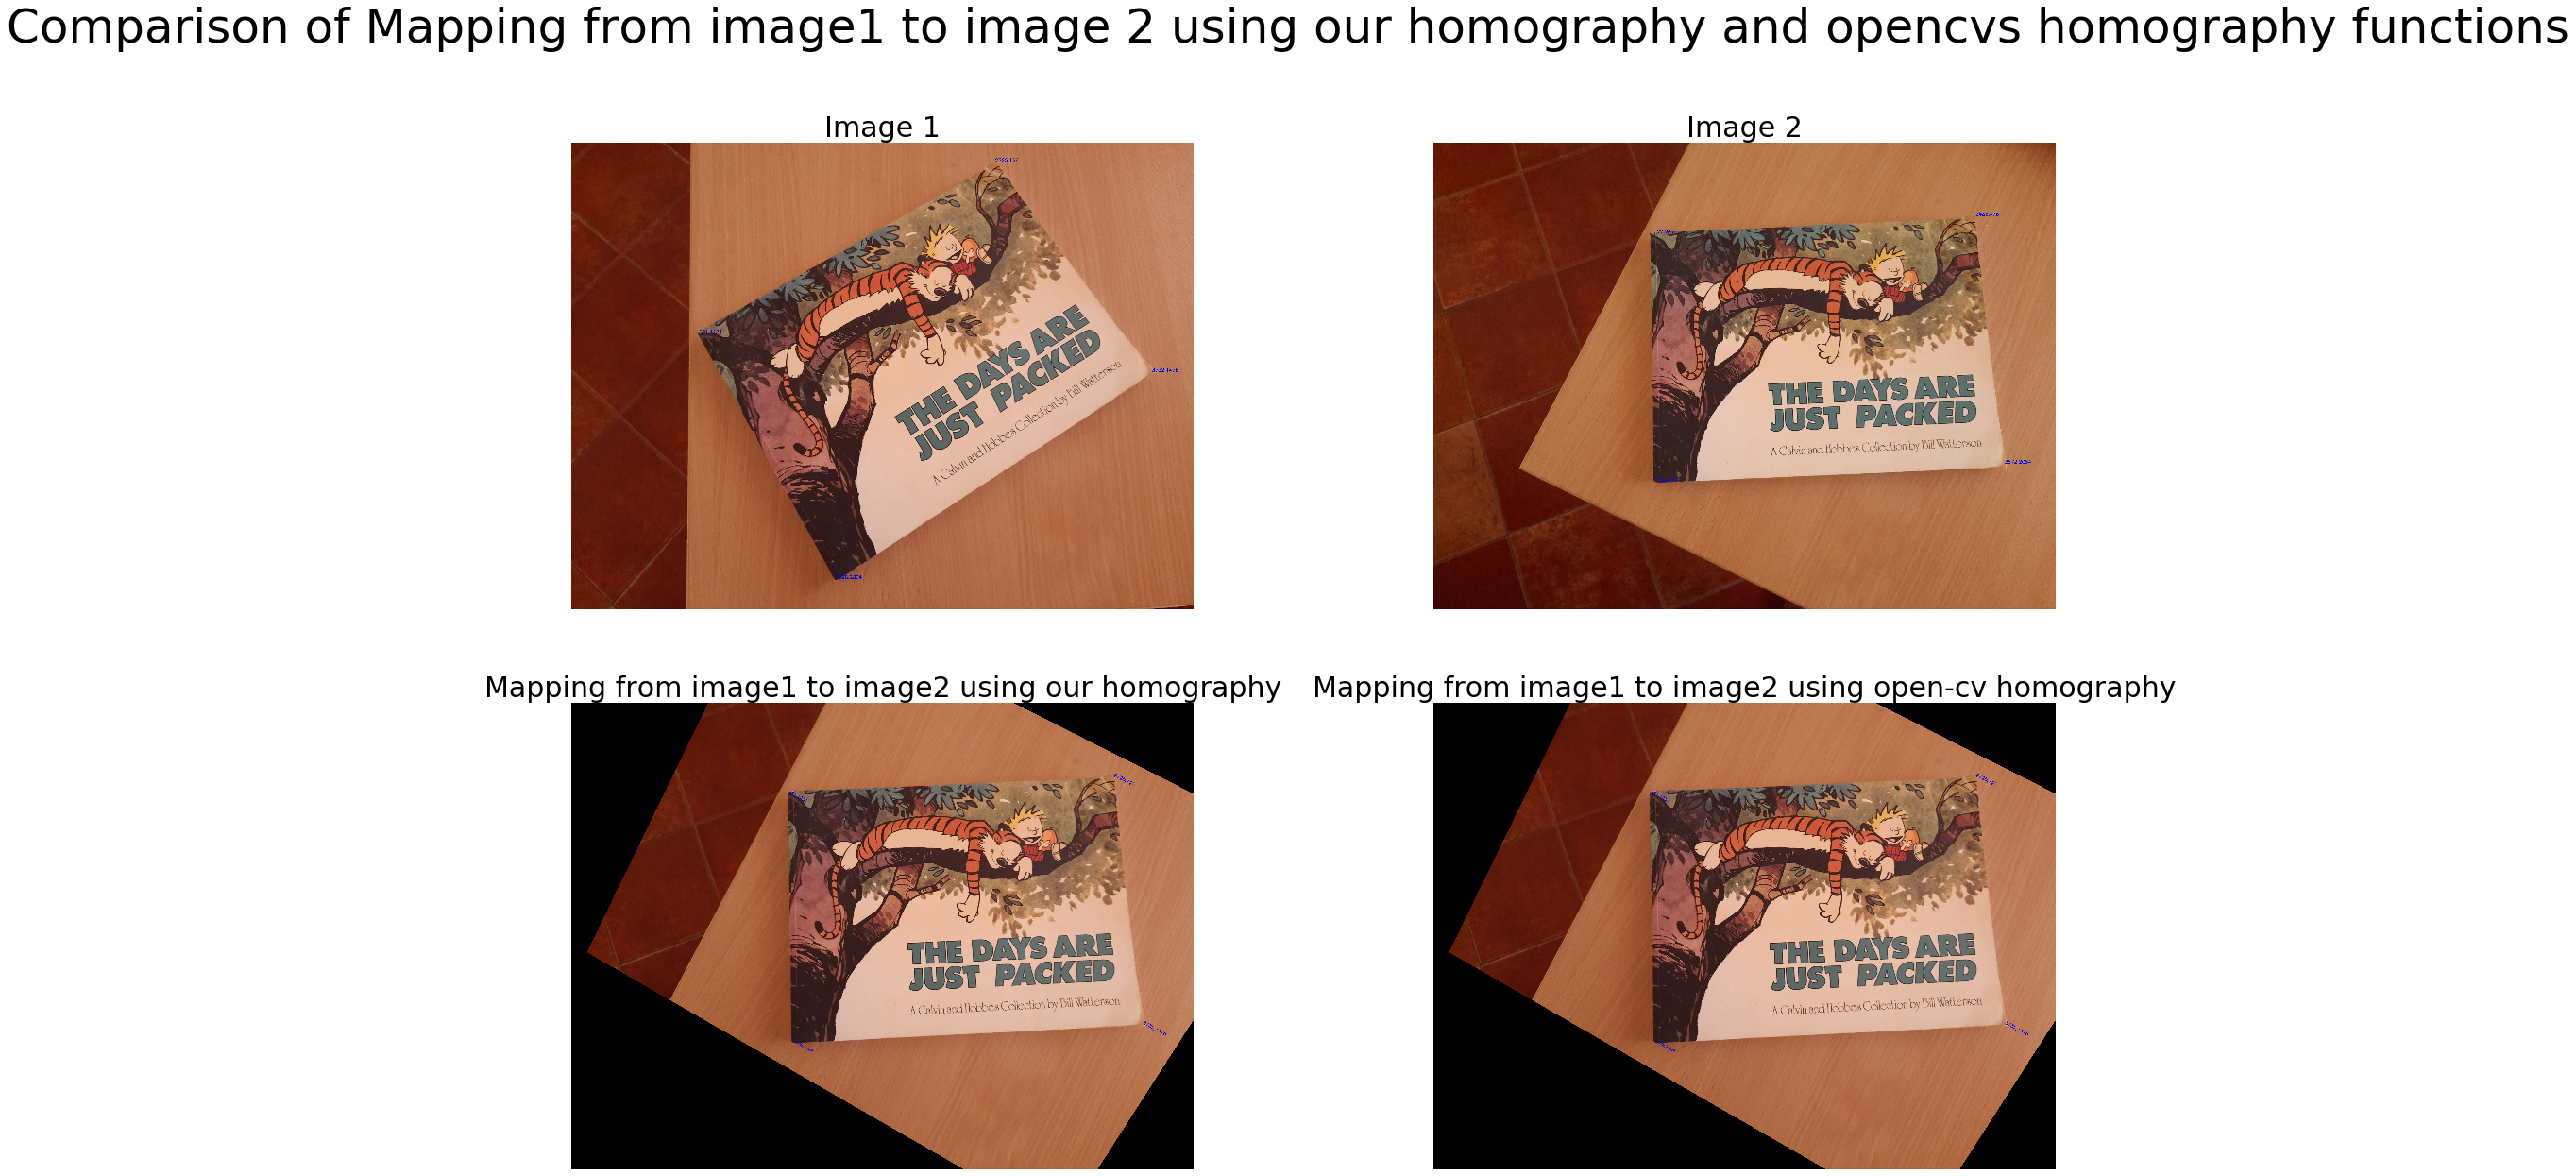

In [79]:
fig, axs = plt.subplots(2,2, figsize = (30,20))
axs[0,0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Image 1", fontsize = 30)
axs[0,0].axis('off')

axs[0,1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("Image 2", fontsize = 30)
axs[0,1].axis('off')

axs[1,0].imshow(cv2.cvtColor(result1,cv2.COLOR_BGR2RGB))
axs[1,0].set_title("Mapping from image1 to image2 using our homography", fontsize = 30)
axs[1,0].axis('off')

axs[1,1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axs[1,1].set_title("Mapping from image1 to image2 using open-cv homography", fontsize = 30)
axs[1,1].axis('off')

plt.suptitle("Comparison of Mapping from image1 to image 2 using our homography and opencvs homography functions", fontsize = 50)

plt.show()

**1.d) For points which are not on the same plane, homography will not be able to align them according to the desired image. A separate homography transformation will be required for those points. This is why homography affects the other parts of the image causing black pixels for those points which are not on the same plane**

### 2) Straightening image 1 to image 3 such that it looks like image 3

In [98]:
#Choosing 4 corner points of book in image1
img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

816   1227
2730   124
1700   2800
3739   1476


In [133]:
pts1 = np.array([[816,1227],
               [2730,124],
               [1700,2800],
               [3739,1476]], dtype = np.float)

In [110]:
#choosing corner points of image 3 and selecting other corner points using the aspect ration of height/width = 30/23
img = img3
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

205   110
3755   74
205   2797
3799   2740


In [134]:
#Fixing points 1 and 3. From that we get height = (2797-110). Now maintaining aspect ratio of 30/23, width = height*(30/23).
#adding width to x coordinates of points 1 and 3 we get the other two points

aspect_ratio = (30/23)
height = (2797 - 110)
width = int(height * aspect_ratio)

pts3 = np.zeros((4,2))
pts3[0] = [205,110]
pts3[2] = [205,2790]
pts3[1] = [(205+width), 110]
pts3[3] = [(205+width), 2790]

pts3

array([[ 205.,  110.],
       [3709.,  110.],
       [ 205., 2790.],
       [3709., 2790.]])

In [11]:
def find_homography(pts1, pts2):
    #stacking matrices Ai to find matrix A such that Ai is computed from x_i' = Hx_i
    n = len(pts1)

    for i in range(n):
        x1,y1 = pts1[i]
        x_1, y_1 = pts2[i]

        Ai = np.array([[-x1, -y1, -1, 0, 0, 0, x1*x_1, y1*x_1, x_1],
              [0, 0, 0, -x1, -y1, -1, x1*y_1, y1*y_1, y_1]
             ])
        if i==0:
            A = Ai.copy()
        else:
            A = np.append(A,Ai, axis = 0)

    #print (A)          
    #finding SVD of A
    u,s,vt = np.linalg.svd(A)
    
    #Getting H by finding the right singular vector corresponding to the smallest singular value
    v = vt.T
    H = v[:,-1]
    
    H = H.reshape((3,3))
    return H
    

In [148]:
H = find_homography(pts1, pts3)

In [151]:
result = cv2.warpPerspective(img1, H, (4000, 3000))


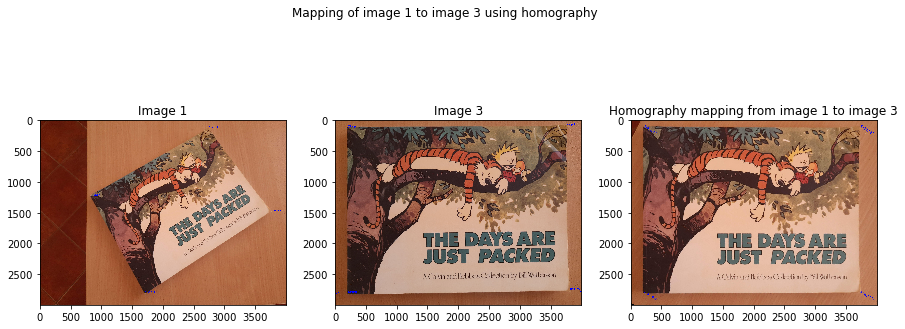

In [161]:
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')

axs[1].imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
axs[1].set_title("Image 3")

axs[2].imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
axs[2].set_title("Homography mapping from image 1 to image 3")

plt.suptitle("Mapping of image 1 to image 3 using homography")
plt.show()

### 3) Two Use cases of Homography

**a) Perspective Correction**

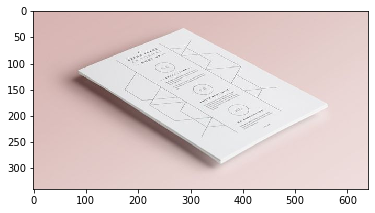

In [36]:
img = cv2.imread('homography_app1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
img.shape

(340, 640, 3)

Suppose, due to camera motion involved and/or some other reason, the image taken is tilted and not taken exactly how it wanted. For example, here, the image is of a book taken in from a tilted perspective. Now, suppose we only require the part of the book and we desire a top view of that. Suppose we already know the aspect ratio of the book is 2:3. Then using homography we can generate a top view image of the book by selecting the four corners of image 1 as src points and selecting the destination points as four corners of the output image with width 300 and height 200, i.e, (0,0), (199,0), (0,299), (199,299).


In [35]:
#step 1: selecting four corners of bill in image1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

88   113
286   33
357   282
556   177


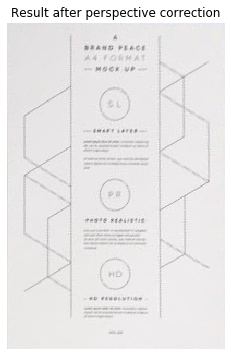

In [49]:
pts1 = [[88,113],[286,33],[357,282],[556,177]]
pts2 = [[0,0],[199,0],[0,299],[199,299]]

H = find_homography(pts1, pts2)
H = H.reshape(3,3)
result = cv2.warpPerspective(img, H, (200,300))

fig = plt.figure(figsize = (10,6))
plt.imshow(result,)
plt.title("Result after perspective correction")
plt.axis('off')
plt.show()

Thus we can apply homography to get a nice top view of the book that was desired but not captured in the image. This is an example of application of homography in perspective correction.

**b) Photoshop purpose**

Suppose we have two images (one of Messi and another of Ronaldo). Now, one may want to photoshop one's face over another in a different jersey. While photoshop may use sophisticated algorithms to perform this operation, multiple applications of homography can also solve this. Here, first we apply a homography to use perspective correction to get a "straight" face of Messi. Then we apply another homography on that image to Ronaldo's image to replace Ronaldo's face with Messi's face in image2. Then we substitute with the background with the background of image2 to get our result. While the result may not be as good as that of a sophisticated Photoshop algorithm, it still works.

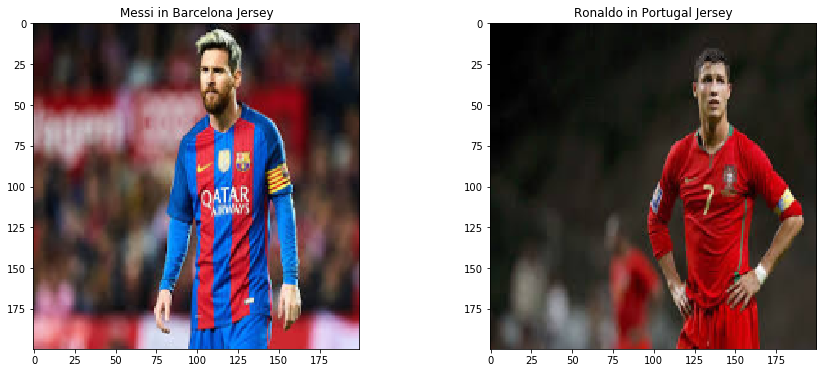

In [114]:
img1 = cv2.resize(cv2.imread('messi.jfif'),(200,200))
img2 = cv2.resize(cv2.imread('ronaldo.jfif'),(200,200))
fig, axs = plt.subplots(1,2, figsize = (15,6))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Messi in Barcelona Jersey")
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].set_title("Ronaldo in Portugal Jersey")
plt.show()

In [92]:
img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

99   12
126   12
104   51
127   46
91   69
146   61


In [93]:
img = img2
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

125   24
144   23
127   56
146   57
114   75
163   74


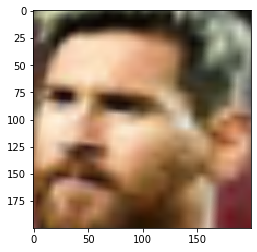

In [99]:
pts1 = np.array([[99,12],[126,12],[104,51],[127,46]])
pts2 = np.array([[0,0],[199,0],[0,199],[199,199]])

H,_ = cv2.findHomography(pts1,pts2)
H = H.reshape((3,3))
messi_pic = cv2.warpPerspective(img1,H, (200,200))
plt.imshow(cv2.cvtColor(messi_pic,cv2.COLOR_BGR2RGB))
plt.show()

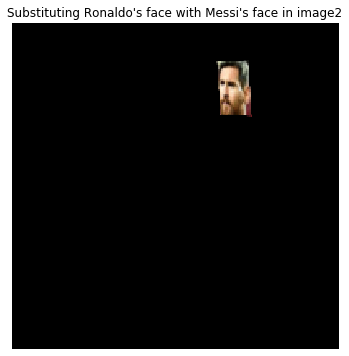

In [117]:
pts2 = np.array([[0,0],[199,0],[0,199],[199,199]])
pts3 = np.array([[125,24],[144,23],[127,56],[146,57]])

t = img2.copy()

H = find_homography(pts2, pts3)
H = H.reshape((3,3))

result = cv2.warpPerspective(messi_pic, H, (200,200))

fig = plt.figure(figsize = (10,6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Substituting Ronaldo's face with Messi's face in image2")
plt.axis('off')
plt.show()

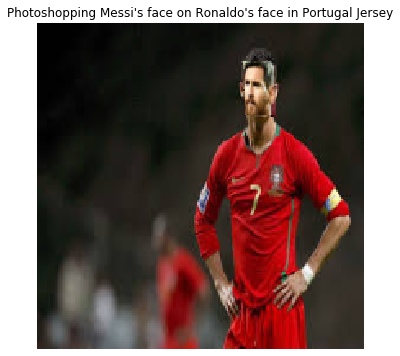

In [118]:
#Substituting background(black) with background of image 2
result2 = np.zeros((200,200,3),dtype = np.uint8)
for i in range(200):
    for j in range(200):
        is_bg_black = True
        for k in range(3):
            if result[i,j,k] !=0:
                is_bg_black = False

        if is_bg_black:
            for k in range(3):
                result2[i,j,k] = t[i,j,k]
        else:
            for k in range(3):
                result2[i,j,k] = result[i,j,k] 
#result = result + t
fig = plt.figure(figsize = (10,6))
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title("Photoshopping Messi's face on Ronaldo's face in Portugal Jersey")
plt.axis('off')
plt.show()